In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv("/content/drive/MyDrive/List of Countries by Sugarcane Production.csv")
# df = pd.read_csv("/content/List of Countries by Sugarcane Production.csv")
# also works

In [16]:
df.shape

(103, 7)

In [17]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# **Data Cleaning**


In [18]:
df=df.drop("Unnamed: 0", axis=1)

In [19]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [20]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [21]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [22]:
df.isna().sum()

,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [23]:
df[df["Yield(Kg/Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [24]:
df=df.drop(99, axis=0)

In [25]:
df.isna().sum()

,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hectare),0
Yield(Kg/Hectare),0


In [26]:
df.shape

(102, 6)

In [27]:
df.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_person(Kg),101
Acreage(Hectare),101
Yield(Kg/Hectare),102


In [28]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [29]:
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"]=df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [30]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


## **Univariate Analysis**

In [31]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# How many countries produce sugarcane from each continent?

In [32]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

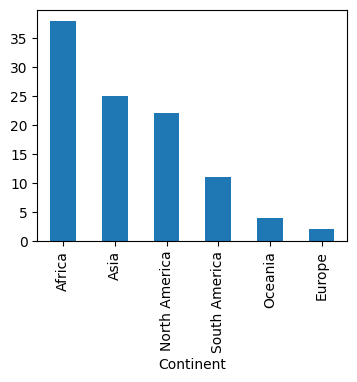

In [33]:
df["Continent"].value_counts().plot(kind="bar", figsize=(4, 3))

In [34]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

In [35]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Which country produces maximum sugarcane?

In [36]:
df_new=df[["Country","Production(Tons)"]]

In [37]:
df_new

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
97,Spain,394.0
98,Lebanon,97.0
100,Singapore,50.0
101,Samoa,12.0


In [56]:
df_new.loc[:, "Production(Tons)_percent"] = df_new["Production(Tons)"] * 100 / df_new["Production(Tons)"].sum()

In [39]:
df_new

,Country,Production(Tons),Production(Tons)_percent
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
97,Spain,394.0,2.087551e-05
98,Lebanon,97.0,5.139401e-06
100,Singapore,50.0,2.649176e-06
101,Samoa,12.0,6.358022e-07


<Axes: ylabel='Production(Tons)_percent'>

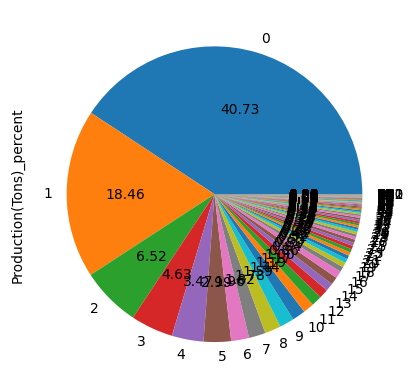

In [40]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

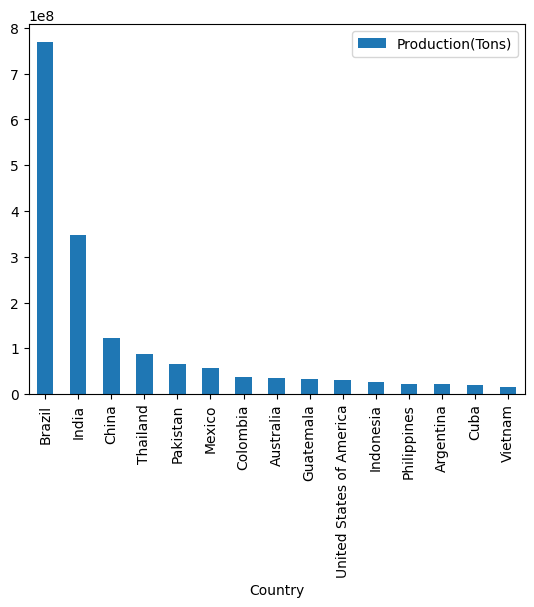

In [43]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar");

# Which country has highest land?

<ipython-input-58-d06d3120ce81>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


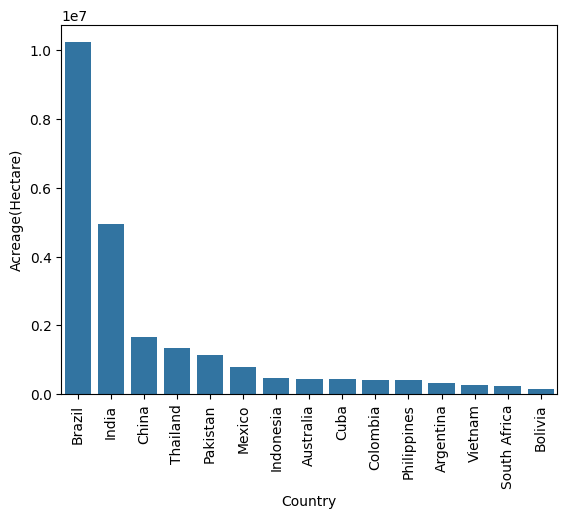

In [58]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

# Which country has highest yield per hectare?

<ipython-input-59-627006c12d02>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


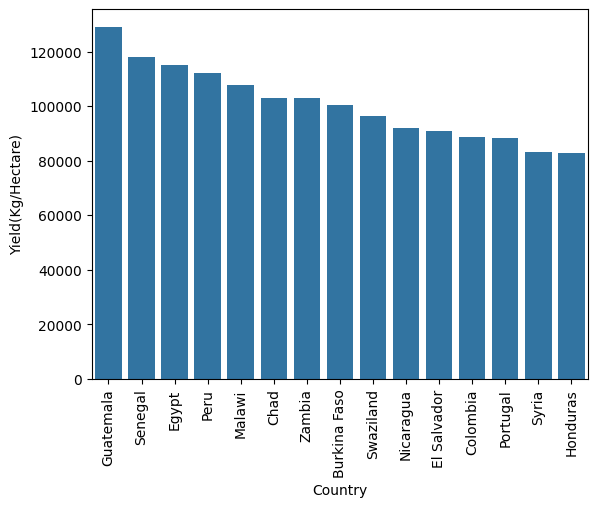

In [59]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

# Which country has highest production per person?

<ipython-input-60-f1965e8be3a0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


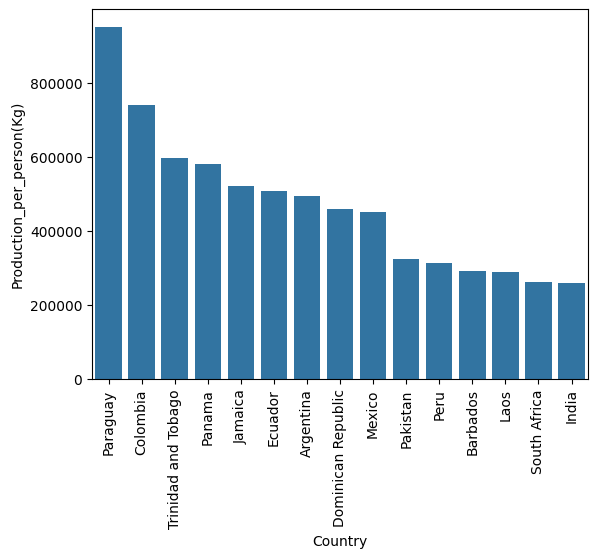

In [60]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

# Correlation

In [66]:
df[['Production(Tons)','Production_per_person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']].corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


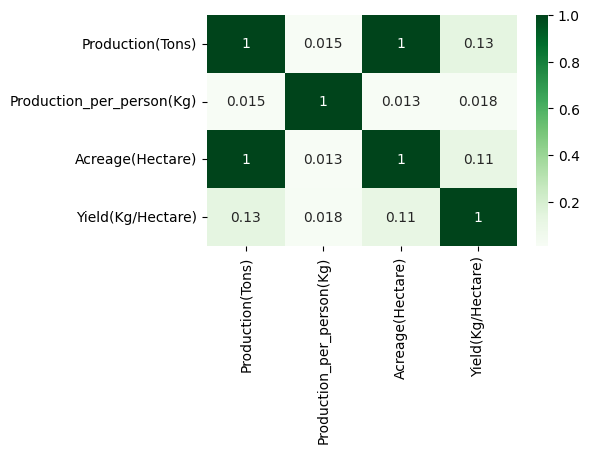

In [79]:
plt.figure(figsize=(5, 3))
sns.heatmap(df[['Production(Tons)','Production_per_person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)']].corr(), annot = True, cmap="Greens")
plt.show()

# Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

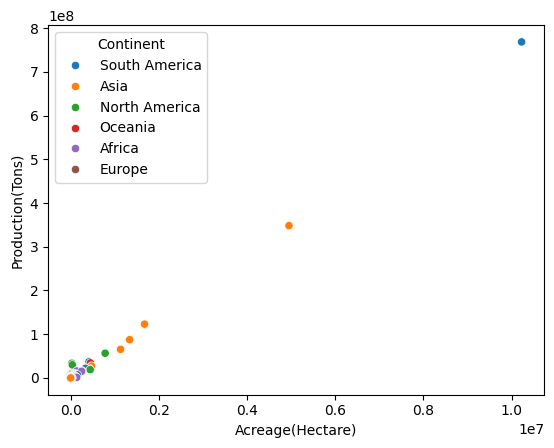

In [80]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

Overall increase in land increases the production

# Analysis for Continent

In [81]:
df_continent = df.groupby("Continent").sum()

In [82]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [83]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


# Which continent produces maximum sugarcane?

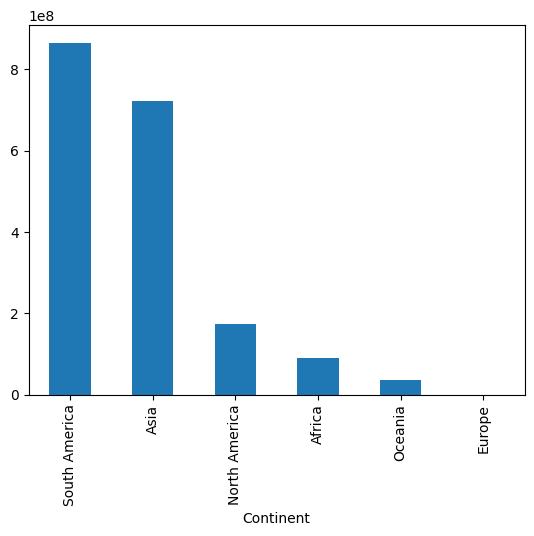

In [85]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar");

# Do continent with highest land produces more sugarcane?

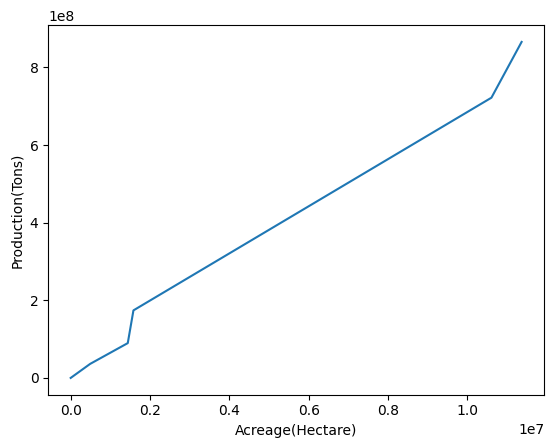

In [86]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" );